# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Marten|secret|
|Nathan|secret|
|Suzanne|secret|
|Robin|secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

# Tutorial networkx to RDF (en natuurlijk weer terug)

## Wat gaan we doen?
### We gaan door middel van onderstaande markdown- en codecellen laten zien hoe wij een networkx graaf op werkelijk magische wijze veranderen in een RDF grafiek. Vervolgens doen wij hetzelfde trucje weer andersom, om te laten zien dat het ook zo kan!


## Grafiek familie
In deze cell maken wij een graph van een familie. Hierop gaan we later onze queries uitvoeren. Allereerst voegen we alle edges en nodes toe, hierbij maken wij ook meteen de relatie $parent$ aan. Vervolgens maken we voor het gemak de helft mannelijk en de helft vrouwelijk. De functie $colornode$ geeft elke sekse een kleur, waardoor het later in de grafiek wat overzichtelijker wordt. Vervolgens wordt in de functie $network2RDF$ het netwerk omgezet tot RDF graaf. Hierbij wordt onderscheid gemaakt tussen de edges die de relatie "parent" en de edges die dat niet hebben. Hierop wordt de indeling van de nodes gebaseerd. De verzameling $queer$ zal later worden gebruikt in de LHBTQI+ grafiek.


C:\Users\31637\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\31637\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


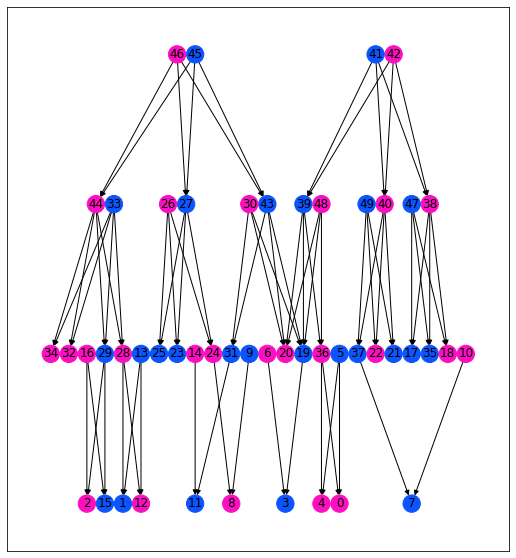

In [2]:
# de libraries worden geimporteerd
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.namespace import FOAF, RDF
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# om de functie te testen wordt een familienetwerk uit week 2 aangemaakt
H = nx.DiGraph()
H.add_edges_from([(45, 44), (46, 44), (45, 43), (46, 43), (45, 27), (46, 27),
                  (42, 40), (41, 40), (42, 39), (41, 39), (42, 38), (41, 38),
                  (44, 34), (33, 34), (44, 32), (33, 32), (44, 29), (33, 29), (44, 28), (33, 28), (43, 31), (30, 31), (43, 20), (30, 20), (43, 19), (30, 19), (27, 25), (26, 25), (27, 24), (26, 24), (27, 23), (26, 23),
                  (40, 37), (49, 37), (40, 22), (49, 22), (40, 21), (49, 21), (39, 36), (48, 36), (39, 20), (48, 20), (39, 19), (48, 19), (38, 35), (47, 35), (38, 18), (47, 18), (38, 17), (47, 17),
                  (29, 15), (16, 15), (29, 2), (16, 2), (31, 11), (14, 11), (37, 7), (10, 7), (19, 3), (6, 3),
                  (28, 12), (13, 12), (28, 1), (13, 1), (24, 8), (9, 8), (36, 4), (5, 4), (36, 0), (5, 0)], attr="parent")

# de helft van de nodes is een man, de andere helft is een vrouw
M,V= {i for i in range(len(H.nodes)) if i%2},{j for j in range(len(H.nodes)) if not j%2}
for n in M:
    H.nodes[n]['M']=True
    H.nodes[n]['V']=False
    
for n in V:
    H.nodes[n]['V']=True
    H.nodes[n]['M']=False
    
# daarnaast krijgen de nodes een kleur mee die het gender aangeeft
def colornode(node):
    """Returnt kleur op basis van genderidentiteit (M/V)"""
    if H.nodes[node]['M']:
        return "#0B54FE" # blauw
    elif H.nodes[node]['V']:
        return "#FC0FC0" # roze

# de plot wordt netjes in een mooi format gevisualiseerd. De edges geven nu een ouder-kindrelatie aan.
plt.figure(figsize=(9,10)) 
colors = [colornode(n) for n in H.nodes]
pos = graphviz_layout(H, prog="dot")    
nx.draw_networkx(H, pos, node_color = colors, with_labels=True) 
n = Namespace("https://deprachtigenamespacevanrobin&marten&suzanne&nathan.org.com.co.uk.KD.nl.be/people/")
plt.show()

# deze functie zet een netwerk om naar een rdf triple-store.
def networkx2RDF(graph):

    triplelist = []
    
    # eerst halen we de de edges met de attrubutes op
    for i in graph.edges.data():
        triplelist.append((i[0], i[2]['attr'], i[1]))
    males = []
    females = []
    queer = []

    # de nodes worden dan onderverdeeld per gender
    for i in graph.nodes:
        if graph.nodes[i]['M'] == True:
            males.append(i)
        elif graph.nodes[i]['V'] == True:
            females.append(i)
        else: queer.append(i)
    plt.show()

    # de triple store wordt aangemaakt
    g = Graph()
    g.bind("foaf", FOAF)
    n.gender
    
    # nu wordt gekeken of er sprake is van een ouder-kindrelatie of van een liefdesrelatie, gebaseerd op de edge attrbutes.
    # de triples worden nu in het juiste format opgeslagen.
    edgedata = list(graph.edges.data())
    if edgedata[0][2]['attr'] == 'parent':
        n.parent
        
        # parent
        for i in triplelist:
            g.add((URIRef(str(n+str(i[0]))), n.parent, URIRef(str(n+str(i[2])))))
    else:
        n.loves
        
        # is attracted to
        for i in triplelist:
            g.add((URIRef(str(n+str(i[0]))), n.loves, URIRef(str(n+str(i[2])))))


    # nu wordt van iedere node de naam en het gender opgeslagen in de triple store
    for i in males:
        g.add((URIRef(str(n)+str(i)), FOAF.name, Literal(i)))
        g.add((URIRef(str(n)+str(i)), RDF.type, Literal('Male')))
    for i in females:
        g.add((URIRef(str(n)+str(i)), FOAF.name, Literal(i)))
        g.add((URIRef(str(n)+str(i)), RDF.type, Literal('Female')))
    for i in queer:
        g.add((URIRef(str(n)+str(i)), FOAF.name, Literal(i)))
        g.add((URIRef(str(n)+str(i)), RDF.type, Literal('Queer')))
        
    # hieronder is onze prachtige graph gevisualiseerd
    return g



## Queries
In de cel hieronder staan onze queries voor de familiegrafiek. Hierbij gebruiken wij een zelfbedachte namespace, aangezien onze familie die hierboven staat verzonnen is. Deze hebben we gedefinïeerd als $n$. Vervolgens hebben wij voor elke familierelatie een query gemaakt waarin de desbetreffende relatie wordt opgevraagd in de graph. Per query gebruiken wij $FILTER$ om het gender van de desbetreffende familierelatie te definïeren. Wij gebruiken de $FOAF:name$ voor het ophalen van de namen (of in dit geval de cijfers) van elke node in de familie. Als vervolgens de resultaten zijn gegenereerd, worden ze door een for-loop gehaald waarbij ze allemaal met de juiste relatie ertussen, dus bijvoorbeeld "is vader van" worden geprint. Voor de overzichtelijkheid beperken wij de hoeveelheid resultaten zodat alleen de eerste 5 resultaten worden geprint. De uiteindelijke output is een lange tekst met steeds 5 van elke familierelatie.


In [3]:
# we slaan onze nieuwe RDF-store op als g
g= networkx2RDF(H)
g.bind("foaf", FOAF)

# nu wordt per relatie een query uitgevoerd die deze relatie teruggeeft.
# vader
n = Namespace("https://deprachtigenamespacevanrobin&marten&suzanne&nathan.org.com.co.uk.KD.nl.be/people/")
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?o FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 ?o  rdf:type ?s.
                                 FILTER (?s = 'Male')}""",
        initNs = { "n": n, "FOAF" : FOAF })

# voor het overzicht worden de eerste 5 resultaten geprint
for i in list(qres)[:5]:
    print(str(i[0]) + " is vader van " + str(i[1]))
    
# moeder
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?o  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Female')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is moeder van " + str(i[1]))
    
# zoon
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Male')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is zoon van " + str(i[0]))
    
# dochter
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Female')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is dochter van " + str(i[0]))
    
# opa
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?o  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?k FOAF:name ?name2.
                                 FILTER (?s = 'Male')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is opa van " + str(i[1]))
    
# oma
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?o  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?k FOAF:name ?name2.
                                 FILTER (?s = 'Female')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is oma van " + str(i[1]))
    
# overgrootvader
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?k n:parent ?p.
                                 ?o  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?p FOAF:name ?name2.
                                 FILTER (?s = 'Male')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is overgrootvader van " + str(i[1]))
    
# overgrootmoeder
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?k n:parent ?p.
                                 ?o  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?p FOAF:name ?name2.
                                 FILTER (?s = 'Female')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is overgrootmoeder van " + str(i[1]))
    
# kleinzoon
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?k  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?k FOAF:name ?name2.
                                 FILTER (?s = 'Male')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is kleinzoon van " + str(i[0]))
    
#kleindochter
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?k  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?k FOAF:name ?name2.
                                 FILTER (?s = 'Female')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is kleindochter van " + str(i[0]))
    
    
#broer
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?k n:parent ?o.
                                 ?k n:parent ?t.
                                 ?o  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Male').
                                 FILTER(?o != ?t).}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is broer van " + str(i[1]))
    
#zus
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?k n:parent ?o.
                                 ?k n:parent ?t.
                                 ?o  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Female').
                                 FILTER(?o != ?t).}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is zus van " + str(i[1]))

# oom
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?p n:parent ?o.
                                 ?p n:parent ?q.
                                 ?q  rdf:type ?s.
                                 ?q FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Male').
                                 FILTER(?o != ?q).}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is oom van " + str(i[1]))
    
# tante
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?p n:parent ?o.
                                 ?p n:parent ?q.
                                 ?q  rdf:type ?s.
                                 ?q FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Female')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[0]) + " is tante van " + str(i[1]))
    
#achterkleinzoon
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?k n:parent ?p.
                                 ?p  rdf:type ?s.
                                 ?q FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Male')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is achterkleinzoon van " + str(i[0]))
    
# achterkleindochter
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?t n:parent ?k.
                                 ?k n:parent ?p.
                                 ?p  rdf:type ?s.
                                 ?o FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Female')}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is achterkleindochter van " + str(i[0]))
    
# neefje
# de zoon van de broer of zus van iemand die niet aangetrouwd is
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?p n:parent ?o.
                                 ?p n:parent ?q.
                                 ?t  rdf:type ?s.
                                 ?q FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Male').
                                 FILTER(?o != ?q).}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is neefje van " + str(i[0]))

# nichtje
# de dochter van de broer of zus van iemand die niet aangetrouwd is
qres = g.query(
        """SELECT DISTINCT ?name ?name2 WHERE { ?o n:parent ?t.
                                 ?p n:parent ?o.
                                 ?p n:parent ?q.
                                 ?t rdf:type ?s.
                                 ?q FOAF:name ?name.
                                 ?t FOAF:name ?name2.
                                 FILTER (?s = 'Female').
                                 FILTER(?o != ?q).}""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in list(qres)[:5]:
    print(str(i[1]) + " is nichtje van " + str(i[0]))

41 is vader van 38
39 is vader van 20
43 is vader van 31
45 is vader van 27
31 is vader van 11
6 is moeder van 3
48 is moeder van 36
46 is moeder van 27
10 is moeder van 7
28 is moeder van 12
3 is zoon van 6
27 is zoon van 46
31 is zoon van 43
7 is zoon van 10
27 is zoon van 45
38 is dochter van 41
20 is dochter van 39
36 is dochter van 48
12 is dochter van 28
40 is dochter van 42
41 is opa van 17
41 is opa van 35
41 is opa van 18
43 is opa van 11
45 is opa van 24
48 is oma van 4
48 is oma van 0
46 is oma van 24
46 is oma van 23
46 is oma van 25
45 is overgrootvader van 8
41 is overgrootvader van 7
45 is overgrootvader van 11
45 is overgrootvader van 3
41 is overgrootvader van 4
46 is overgrootmoeder van 8
42 is overgrootmoeder van 7
46 is overgrootmoeder van 11
46 is overgrootmoeder van 3
46 is overgrootmoeder van 12
31 is kleinzoon van 45
31 is kleinzoon van 46
11 is kleinzoon van 30
11 is kleinzoon van 43
1 is kleinzoon van 44
20 is kleindochter van 42
20 is kleindochter van 41
12 i

# LHBTQI+
In deze cell maken wij een graph van een LHBTQI+. Allereerst beschrijven wij welke nodes welke betekenis precies hebben. Hierop volgen onze primitievensets. Daarna laten wij zien welke eigenschappen elke set heeft en daaarop een aantal primitieven als functies. Vervolgens geven wij een aantal predicaten die gebasseerd zijn op de voorgaande reeks. Hierna wordt er geprint wie wie is, op basis van de voorgaande code. Als laatste wordt de graaf getekend met bijpassende legenda en op kleur passende nodes.


C:\Users\31637\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\31637\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


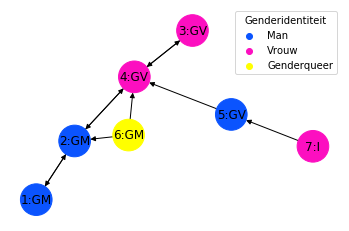

Hetero: {5, 7}
Homo: {1}
Lesbisch: {3}
Biseksueel: {2, 4, 6}


In [4]:
# Graaf
# deze code komt van een van onze groepsleden uit week 2 en maakt een LHBTQI+-netwerk aan.

H = nx.DiGraph()

# 1 is een homoman
# 2 is een biseksuele man
# 3 is een lesbische vrouw
# 4 is een biseksuele vrouw
# 5 is een heteroseksuele transman
# 6 is een biseksuele queerpersoon
# 7 is een intersekse persoon die zich als vrouw identificeert en heteroseksueel is
H.add_edges_from([(1,2),(2,1),(2,4),(3,4),(4,2),(4,3),(5,4),(6,4),(6,2),(7,5)], attr = "loves")

# Primitievensets
Mset = {1,2, 5}
Vset = {3,4,7}
Qset = {6}
GVset = {3,4,5,7}
GMset = {1,2,6,7}

# Eigenschappen
for n in Mset:
    H.nodes[n]['M']=True
    H.nodes[n]['V']=False
    H.nodes[n]['Q']=False  
for n in Vset:
    H.nodes[n]['V']=True
    H.nodes[n]['M']=False
    H.nodes[n]['Q']=False
for n in Qset:
    H.nodes[n]['V']=False
    H.nodes[n]['M']=False
    H.nodes[n]['Q']=True 
for n in GMset:
    H.nodes[n]['GM']=True
    H.nodes[n]['GV']=False
for n in GVset:
    H.nodes[n]['GV']=True
    H.nodes[n]['GM']=False
for n in GMset&GVset:
    H.nodes[n]['GV']=True
    H.nodes[n]['GM']=True

# Wat primitieven als functie
def M(x, network):
    return network.nodes[x]['M']
def V(x, network):
    return network.nodes[x]['V']
def Q(x, network):
    return network.nodes[x]['Q']
def R(x,y,network):
    return network.has_edge(x,y)

# Vier predicaten als comprehensies, de rest is op basis van reeds gemaakte sets
Hetero = {x for x in H
    if ({y for y in H if R(x,y,H) and M(x,H) and V(y,H)} or {y for y in H if R(x,y,H) and V(x,H) and M(y,H)}) 
    and not ({y for y in H if R(x,y,H) and M(x,H) and M(y,H)} or {y for y in H if R(x,y,H) and V(x,H) and V(y,H)})}
Homo = {x for x in H
    if M(x,H) and {y for y in H if R(x,y,H) and M(y,H)} and not {y for y in H if R(x,y,H) and V(y,H)}}
Lesbisch = {x for x in H
    if V(x,H) and {y for y in H if R(x,y,H) and V(y,H)} and not {y for y in H if R(x,y,H) and M(y,H)}}
Biseksueel = {x for x in H
    if {y for y in H if R(x,y,H) and M(y,H)} and {y for y in H if R(x,y,H) and V(y,H)}}


def colornode(node):
    """Returnt kleur op basis van genderidentiteit (M/V/Q)"""
    if H.nodes[node]['M']:
        return "#0B54FE" # blauw
    elif H.nodes[node]['V']:
        return "#FC0FC0" # roze
    return "#FFFF00" # geel

def labelnode(node):
    """Labelt elke node met geboortekenmerken"""
    if H.nodes[node]['GM'] and H.nodes[node]['GV']:
        return "I"
    elif H.nodes[node]['GM']:
        return "GM"
    else:
        return "GV"

# De graaf tekenen
colors = [colornode(n) for n in H.nodes]  
plt.scatter([],[], c=["#0B54FE"], label="Man")
plt.scatter([],[], c=["#FC0FC0"], label="Vrouw")
plt.scatter([],[], c=["#FFFF00"], label="Genderqueer")
plt.legend(title="Genderidentiteit")
mapping = {node:str(node)+":"+labelnode(node) for node in H}
H = nx.relabel_nodes(H, mapping)
nx.draw(H, with_labels=True, node_color=colors, node_size=1000)
plt.show()
print("Hetero: " + str(Hetero))
print("Homo: " + str(Homo))
print("Lesbisch: " + str(Lesbisch))
print("Biseksueel: " + str(Biseksueel))

## Queries #2
Net als eerder gebruiken wij queries om uit onze RDF-database informatie op te halen. Dit keer gaat het om een netwerk waarbij de zelfbedachte relatie n:loves hebben toegepast. Als er een relatie is tussen twee nodes betekent dit dus dat de ene node van de andere houdt en zich dus tot deze persoon aangetrokken voelt. Vervolgens worden de resultaten weer leesbaar geprint.


In [5]:
n = Namespace("https://deprachtigenamespacevanrobin&marten&suzanne&nathan.org.com.co.uk.KD.nl.be/people/")
g = networkx2RDF(H)


# iemand is biseksueel als hij/zij op zowel een man als een vrouw valt
qres = g.query(
        """SELECT DISTINCT ?name WHERE { ?o n:loves ?t.
                                    ?o n:loves ?q.
                                    ?q rdf:type ?gender.
                                    ?t rdf:type ?gender2.
                                    ?o FOAF:name ?name
                                    FILTER (?gender = 'Male').
                                    FILTER (?gender2 = 'Female').
                                    }""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in qres:
    print(str((i[0])) + " is biseksueel")

# iemand die zich identificeert als queer is een persoon met het gender queer
qres = g.query(
        """SELECT DISTINCT ?name WHERE { 
                                    ?o rdf:type ?gender.
                                    ?o FOAF:name ?name
                                     FILTER (?gender = 'Queer').
                                     }""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in qres:
    print(str((i[0])) + " is queer")
    
# iemand die homoseksueel is, is een man en valt zelf ook op een man
qres = g.query(
        """SELECT DISTINCT ?name WHERE { ?o n:loves ?t.
                                      
                                    ?o rdf:type ?gender.
                                    ?t rdf:type ?gender2.
                                    ?o FOAF:name ?name
                                    FILTER NOT EXISTS 
                                    {?o n:loves ?n.
                                    ?n rdf:type ?gender3
                                    FILTER (?gender3 = 'Female')
                                    }
                                    FILTER (?gender = 'Male')
                                    }""",
        initNs = { "n": n, "FOAF" : FOAF })
for i in qres:
    print(str((i[0])) + " is homo")
    
# iemand die lesbisch is, is een vrouw en valt zelf ook op een vrouw
qres = g.query(
        """SELECT DISTINCT ?name WHERE { ?o n:loves ?t.
                                      
                                    ?o rdf:type ?gender.
                                    ?t rdf:type ?gender2.
                                    ?o FOAF:name ?name
                                    FILTER NOT EXISTS 
                                    {?o n:loves ?n.
                                    ?n rdf:type ?gender3
                                    FILTER (?gender3 = 'Male')
                                    }
                                    FILTER (?gender = 'Female')
                                    }""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in qres:
    print(str((i[0])) + " is lesbisch")
    
# iemand die heteroseksueel is, is een man en valt of een vrouw, of is een vrouw en valt op een man
qres = g.query(
        """SELECT DISTINCT ?name WHERE {
                                    ?o n:loves ?t.
                                    ?o FOAF:name ?name.
                                    ?o rdf:type ?gender.
                                    ?t rdf:type ?gender2.
                                    FILTER (?gender != ?gender2)
                                    FILTER NOT EXISTS {?o n:loves ?g
                                    FILTER (?g != ?t)}
                                 }""",
        initNs = { "n": n, "FOAF" : FOAF })

for i in qres:
    print(str((i[0])) + " is hetero")

2:GM is biseksueel
6:GM is biseksueel
4:GV is biseksueel
6:GM is queer
1:GM is homo
3:GV is lesbisch
5:GV is hetero
7:I is hetero


## RDF-store omzetten naar Netwerk
Hierbij gebeurt precies het tegenovergestelde van wat we hiervoor hebben gedaan. We downloaden eerst een RDF-database van het internet, in dit geval over politicus Geert Wilders. Vervolgens worden de triples netjes 1 voor 1 opgeslagen in een lijst. De lijst wordt voor het gemak even beperkt tot 20 items, om de graph goed leesbaar te houden. Uiteraard hoeft dit niet om de functie te laten werken. De figuur wordt vervolgens omgezet naar een netwerk, en wordt geplot. Tot slot worden een aantal maten over het gehele netwerk berekend, zodat in 1 opslag een aantal relevante details over het netwerk zichtbaar zijn.


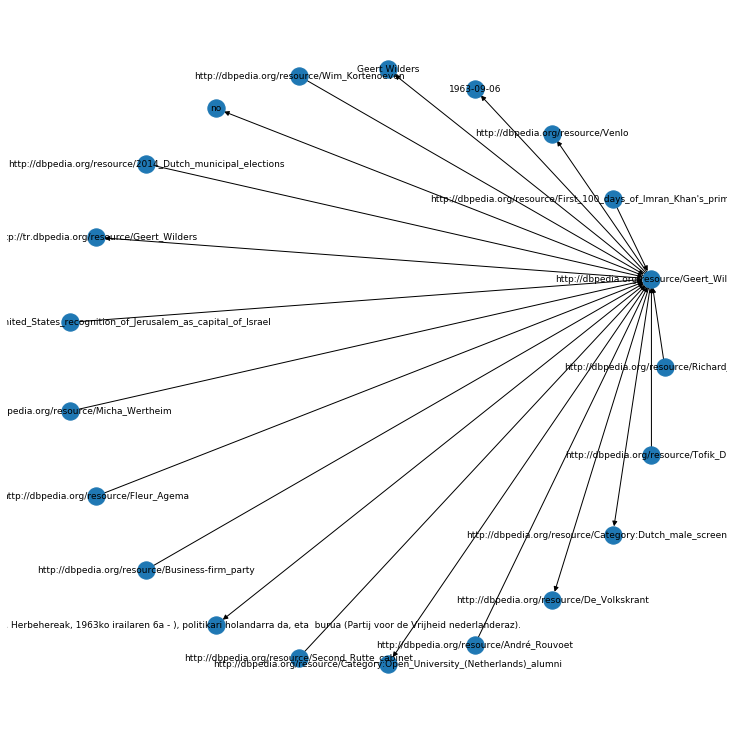

Netwerk Maten:
Type: DiGraph
Number of nodes: 774
Number of edges: 838
Average in degree:   1.0827
Average out degree:   1.0827
Density: 0.0014006304508425512
Transitvity: 0


In [6]:
# Vraag 3
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph

# we maken een rdflib-graph aan een parsen deze via een database van het internet
g=Graph()
g.parse('http://dbpedia.org/resource/Geert_Wilders')

# de triples worden uit de graph gehaald
triples= [triple for triple in g]

# voor de bruikbaarheid beperken we de dataset. Uiteraard werkt de functie ook met een grotere dataset
triples = triples[:20]

# Part of Geert Wilders Graph
plt.figure(figsize=(10,10))

# de graph wordt omgezet naar een netwerk en wordt getekend
graph = rdflib_to_networkx_digraph(triples)
nx.draw_circular(graph, with_labels=True, font_size=9)
plt.show()

# wordt gebruikt om een aantal netwerk maten te vinden
complete_graph = rdflib_to_networkx_digraph(g)
print(f"""Netwerk Maten:
{nx.info(complete_graph)[7:]}
Density: {nx.density(complete_graph)}
Transitvity: {nx.transitivity(complete_graph)}""")